## 샘플 데이터셋 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import load_boston
import torch

warnings.filterwarnings('ignore')

In [2]:
# sklearn.datasets 내장 데이터셋인 보스톤 주택 가격 데이터셋 로드
data = load_boston()

**컬럼 소개**

속성 수 : 13

* **CRIM**: 자치시 별 범죄율
* **ZN**: 25,000 평방 피트를 초과하는 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 토지 비율
* **CHAS**: 찰스 강과 인접한 경우에 대한 더비 변수 (1= 인접, 0= 인접하지 않음)
* **NOX**: 산화 질소 농도 (10ppm)
* **RM**:주택당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시별 학생-교사 비율
* **B**: 인구당 흑인의 비율. 1000(Bk - 0.63)^2, (Bk는 흑인의 비율을 뜻함)
* **LSTAT**: 하위 계층의 비율
* **target**: 자가 주택의 중앙값 (1,000 달러 단위)

In [3]:
# 데이터프레임 생성. 504개의 행. Feature: 13개, target은 예측 변수(주택가격)
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 데이터셋 분할 (x, y)

In [4]:
# feature(x), label(y)로 분할
x = df.drop('target', 1)
y = df['target']

# feature 변수의 개수 지정
NUM_FEATURES = len(x.columns)

## 데이터 정규화

- `sklearn.preprocessing 의 `StandardScaler`나 `MinMaxScaler`로 특성(feature) 값을 표준화 혹은 정규화를 진행합니다.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled[:5]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         1.28271368, -0.26581176,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.39642699, -1.2087274 ],
       [-0.41675042, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.01630251, -0.80988851,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.41616284, -1.36151682],
       [-0.41248185, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.22857665, -0.51117971,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.44105193, -1.02650148]])

## PyTorch를 활용하여 회귀(regression) 예측

random 텐서 `w`, 와 `b`를 생성합니다.

`w`의 `Size()`는 `13개`입니다. 이유는 특성(feature) 변수의 개수와 동일해야 합니다.

In [6]:
# random w, b 생성
w = torch.randn(NUM_FEATURES, requires_grad=True, dtype=torch.float64)
b = torch.randn(1, requires_grad=True, dtype=torch.float64)

# w의 Size()는 13, b는 1개 생성
w.shape, b.shape

(torch.Size([13]), torch.Size([1]))

손실함수(Mean Squared Error)를 정의 합니다.

In [7]:
# Mean Squared Error(MSE) 오차 정의
loss_fn = lambda y_true, y_pred: ((y_true - y_pred)**2).mean()

`x`, `y`를 tensor로 변환합니다.

In [9]:
x = torch.tensor(x_scaled)
y = torch.tensor(y.values)

x.shape, y.shape

(torch.Size([506, 13]), torch.Size([506]))

단순 선형회귀 생성(simple linear regression)

In [10]:
y_hat = torch.matmul(x, w)
print(y_hat.shape)

# y_hat 10개 출력
y_hat[:10].data.numpy()

torch.Size([506])


array([-1.09528567, -2.03626834, -2.50430817, -3.45297498, -3.25141853,
       -3.19429977,  0.2703441 ,  1.01406933,  2.12506136,  1.08349359])

## 경사하강법을 활용한 회귀 예측

In [16]:
# 최대 반복 횟수 정의
num_epoch = 20000

# 학습율 (learning_rate)
learning_rate = 5e-4

# random w, b 생성
w = torch.randn(NUM_FEATURES, requires_grad=True, dtype=torch.float64)
b = torch.randn(1, requires_grad=True, dtype=torch.float64)

# loss, w, b 기록하기 위한 list 정의
losses = []

for epoch in range(num_epoch):
    # Affine Function
    y_hat =  torch.matmul(x, w) + b

    # 손실(loss) 계산
    loss = loss_fn(y, y_hat)
    
    # 손실이 20 보다 작으면 break 합니다.
    if loss < 20:
        break

    # w, b의 미분 값인 grad 확인시 다음 미분 계산 값은 None이 return 됩니다.
    # 이러한 현상을 방지하기 위하여 retain_grad()를 loss.backward() 이전에 호출해 줍니다.
    w.retain_grad()
    b.retain_grad()
    
    # 미분 계산
    loss.backward()
    
    # 경사하강법 계산 및 적용
    # w에 learning_rate * (그라디언트 w) 를 차감합니다.
    w = w - learning_rate * w.grad
    # b에 learning_rate * (그라디언트 b) 를 차감합니다.
    b = b - learning_rate * b.grad
    
    # 계산된 loss, w, b를 저장합니다.
    losses.append(loss.item())

    if epoch % 1000 == 0:
        print("{0:05d} loss = {1:.5f}".format(epoch, loss.item()))
    
print("----" * 15)
print("{0:05d} loss = {1:.5f}".format(epoch, loss.item()))

00000 loss = 579.66085
01000 loss = 93.57605
02000 loss = 32.96278
03000 loss = 24.42413
04000 loss = 23.00189
05000 loss = 22.62038
06000 loss = 22.43333
07000 loss = 22.30946
08000 loss = 22.21997
09000 loss = 22.15347
10000 loss = 22.10328
11000 loss = 22.06487
12000 loss = 22.03509
13000 loss = 22.01169
14000 loss = 21.99307
15000 loss = 21.97806
16000 loss = 21.96581
17000 loss = 21.95572
18000 loss = 21.94731
19000 loss = 21.94024
------------------------------------------------------------
19999 loss = 21.93426


## weight 출력

- 음수: 종속변수(주택가격)에 대한 반비례
- 양수: 종속변수(주택가격)에 대한 정비례
- 회귀계수:
  - 계수의 값이 커질 수록 종속변수(주택가격)에 더 크게 영향을 미침을 의미
  - 계수의 값이 0에 가깝다면 종속변수(주택가격)에 영향력이 없음을 의미

In [17]:
pd.DataFrame(list(zip(df.drop('target', 1).columns, w.data.numpy())), columns=['features', 'weights']) \
.sort_values('weights', ignore_index=True)

,features,weights
0,LSTAT,-3.732330
1,DIS,-3.036964
2,PTRATIO,-2.033768
3,NOX,-1.952553
4,TAX,-1.540389
5,CRIM,-0.878551
6,INDUS,-0.043276
7,AGE,-0.004709
8,CHAS,0.708043
9,B,0.849340


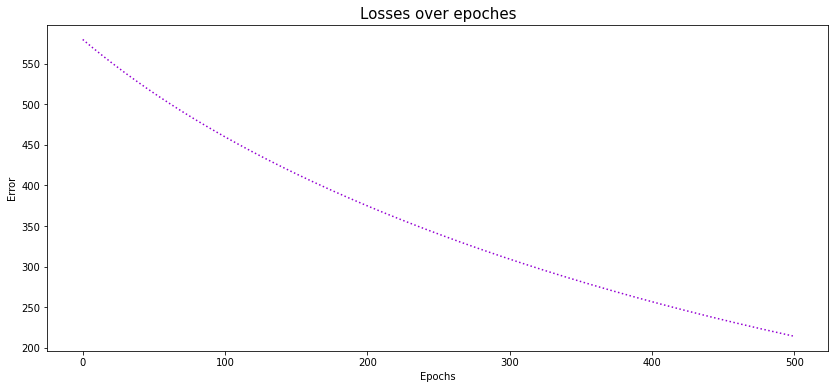

In [18]:
# 전체 loss 에 대한 변화량 시각화
plt.figure(figsize=(14, 6))
plt.plot(losses[:500], c='darkviolet', linestyle=':')

plt.title('Losses over epoches', fontsize=15)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()